In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [2]:
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


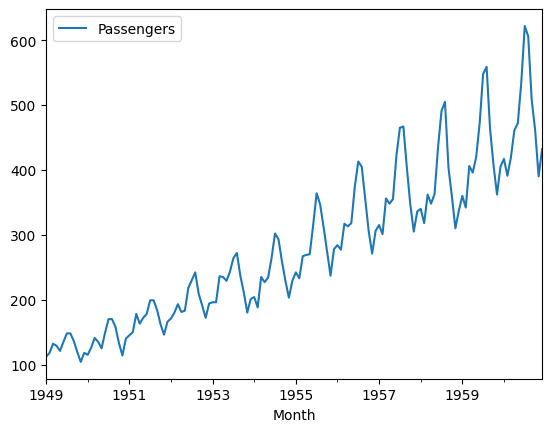

In [7]:
df.plot();

In [8]:
df['LogPassengers'] = np.log(df['Passengers'])

In [9]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [10]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [11]:
df['DiffPassengers'] = df['LogPassengers'].diff()

In [12]:
series = df['DiffPassengers'].dropna().to_numpy()

T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print(f'X.shape : {X.shape}, Y.shape : {Y.shape}')

X.shape : (133, 10), Y.shape : (133,)


In [13]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [14]:
i = Input(shape = (T, ))
x = Dense(32, activation = 'relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [15]:
model.compile(
    loss = 'mse',
    optimizer = 'adam',
    metrics = 'mae'
)

In [16]:
results = model.fit(
    Xtrain,
    Ytrain,
    epochs = 100,
    validation_data = (Xtest, Ytest)
)

Epoch 1/100
4/4 [==============================] - 4s 228ms/step - loss: 0.0168 - mae: 0.1055 - val_loss: 0.0146 - val_mae: 0.1034
Epoch 2/100
4/4 [==============================] - 0s 60ms/step - loss: 0.0155 - mae: 0.1020 - val_loss: 0.0136 - val_mae: 0.0990
Epoch 3/100
4/4 [==============================] - 0s 57ms/step - loss: 0.0144 - mae: 0.0988 - val_loss: 0.0128 - val_mae: 0.0948
Epoch 4/100
4/4 [==============================] - 0s 47ms/step - loss: 0.0136 - mae: 0.0959 - val_loss: 0.0121 - val_mae: 0.0911
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0127 - mae: 0.0929 - val_loss: 0.0115 - val_mae: 0.0879
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 0.0119 - mae: 0.0902 - val_loss: 0.0109 - val_mae: 0.0847
Epoch 7/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0113 - mae: 0.0874 - val_loss: 0.0103 - val_mae: 0.0819
Epoch 8/100
4/4 [==============================] - 0s 38ms/step - loss: 0.0106 - mae: 0.0

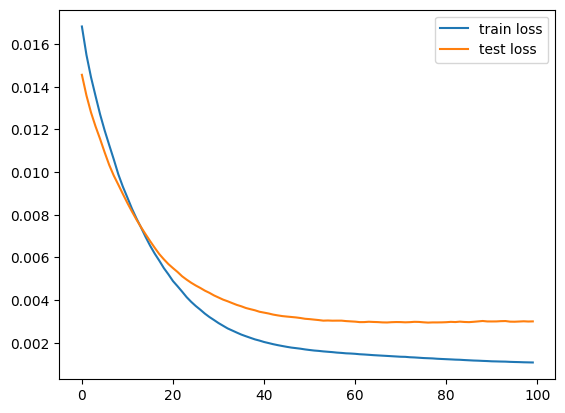

In [17]:
plt.plot(results.history['loss'], label = 'train loss')
plt.plot(results.history['val_loss'], label = 'test loss')
plt.legend();

In [18]:
train_idx[:T+1] = False

In [19]:
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

1/1 [==============================] - 0s 31ms/step


In [20]:
df.loc[train_idx, 'Diff ANN Train Predictions'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Predictions'] = Ptest

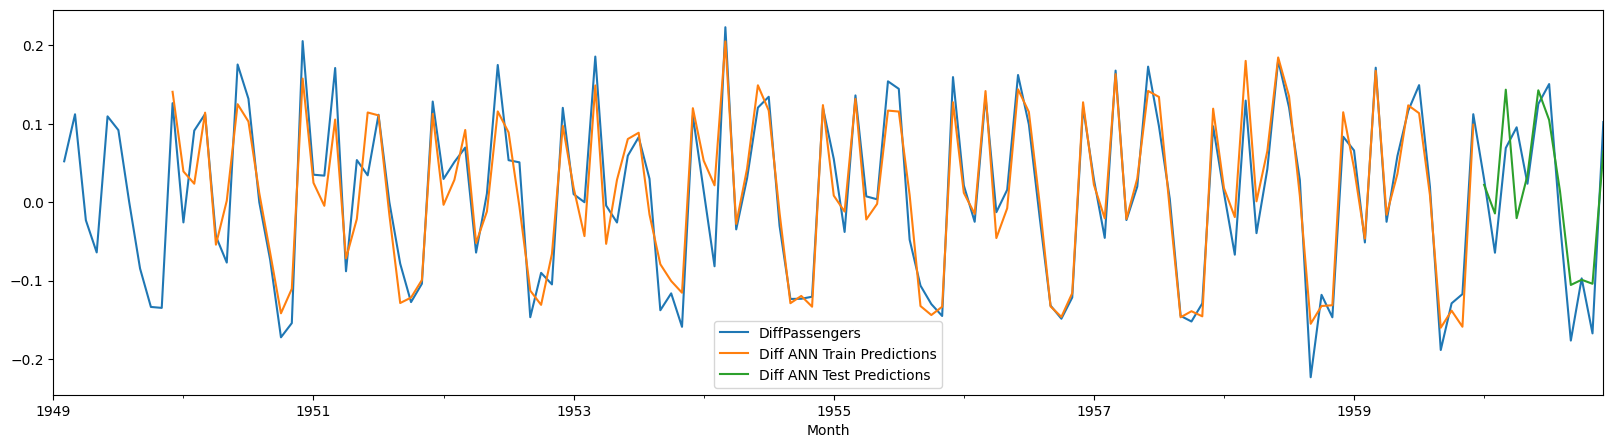

In [22]:
cols = ['DiffPassengers', 'Diff ANN Train Predictions', 'Diff ANN Test Predictions']
df[cols].plot(figsize = (20,5));